### Classification of Penguins 

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Loading dataset
df = pd.read_csv("/content/drive/MyDrive/Streamlit_Apps/penguins_cleaned.csv")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
3,Adelie,Torgersen,36.7,19.3,193,3450,female
4,Adelie,Torgersen,39.3,20.6,190,3650,male


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    int64  
 5   body_mass_g        333 non-null    int64  
 6   sex                333 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 18.3+ KB


In [4]:
##We can see that there is no missing values in datasets
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [5]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [6]:
df['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [7]:
df['island'].value_counts()

Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64

### Data Visualization

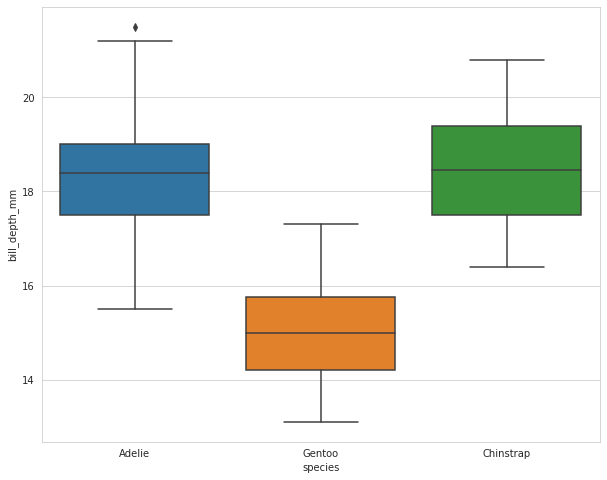

In [8]:

import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize = (10,8))
sns.boxplot(x = df['species'], y = df['bill_depth_mm'], data = df)
plt.show()

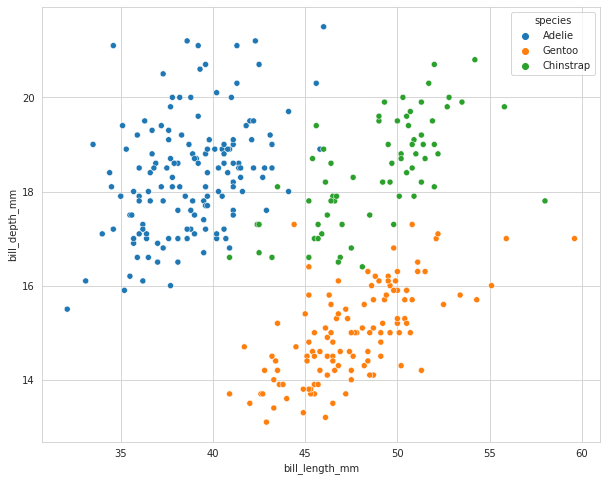

In [9]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = 'bill_length_mm', y = 'bill_depth_mm',hue= 'species' , data = df)
plt.show()

In [10]:
islands = df['island'].value_counts().reset_index()
islands

,index,island
0,Biscoe,163
1,Dream,123
2,Torgersen,47


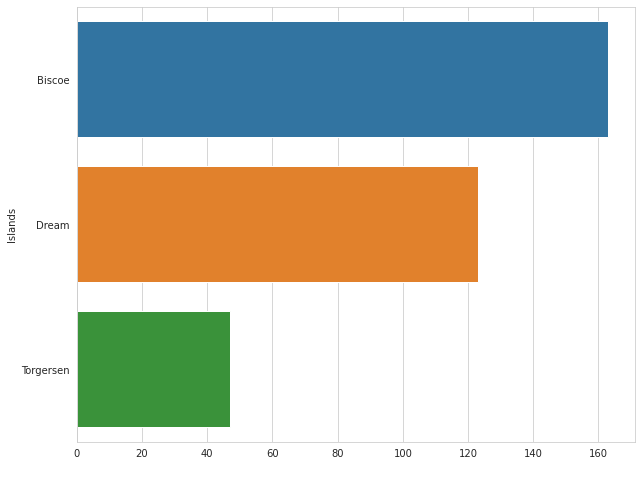

In [11]:
plt.figure(figsize = (10, 8))
sns.barplot(x = 'island', y = 'index', data = islands)
plt.xlabel(" ")
plt.ylabel("Islands")
plt.show()

- From the above plot, we can see that Biscoe island consists of more penguins.

In [12]:
new_df = df.loc[:, ['species', 'bill_length_mm', 'bill_depth_mm','sex', 'flipper_length_mm', 'body_mass_g']]
new_df['mean_bill_length'] = new_df.groupby(['species', 'sex'])['bill_length_mm'].transform('mean')

In [13]:
new_df.head()

,species,bill_length_mm,bill_depth_mm,sex,flipper_length_mm,body_mass_g,mean_bill_length
0,Adelie,39.1,18.7,male,181,3750,40.390411
1,Adelie,39.5,17.4,female,186,3800,37.257534
2,Adelie,40.3,18.0,female,195,3250,37.257534
3,Adelie,36.7,19.3,female,193,3450,37.257534
4,Adelie,39.3,20.6,male,190,3650,40.390411


In [14]:
new_df.drop('bill_length_mm', axis = 1, inplace = True)

In [15]:
new_df.head()

,species,bill_depth_mm,sex,flipper_length_mm,body_mass_g,mean_bill_length
0,Adelie,18.7,male,181,3750,40.390411
1,Adelie,17.4,female,186,3800,37.257534
2,Adelie,18.0,female,195,3250,37.257534
3,Adelie,19.3,female,193,3450,37.257534
4,Adelie,20.6,male,190,3650,40.390411


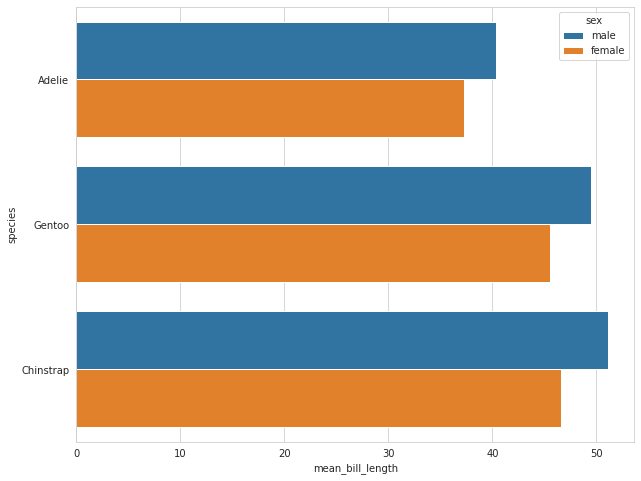

In [16]:
plt.figure(figsize = (10, 8))
sns.barplot(x = 'mean_bill_length', y = 'species', hue = 'sex', data = new_df)
plt.show()

- From the above plot we can conclude that Chinstrap species has the highest bill length.

In [17]:
new_df['mean_bill_depth'] = new_df.groupby(['species', 'sex'])['bill_depth_mm'].transform('mean')

In [18]:
new_df.head()

,species,bill_depth_mm,sex,flipper_length_mm,body_mass_g,mean_bill_length,mean_bill_depth
0,Adelie,18.7,male,181,3750,40.390411,19.072603
1,Adelie,17.4,female,186,3800,37.257534,17.621918
2,Adelie,18.0,female,195,3250,37.257534,17.621918
3,Adelie,19.3,female,193,3450,37.257534,17.621918
4,Adelie,20.6,male,190,3650,40.390411,19.072603


In [19]:
new_df.drop('bill_depth_mm', axis =1, inplace = True)

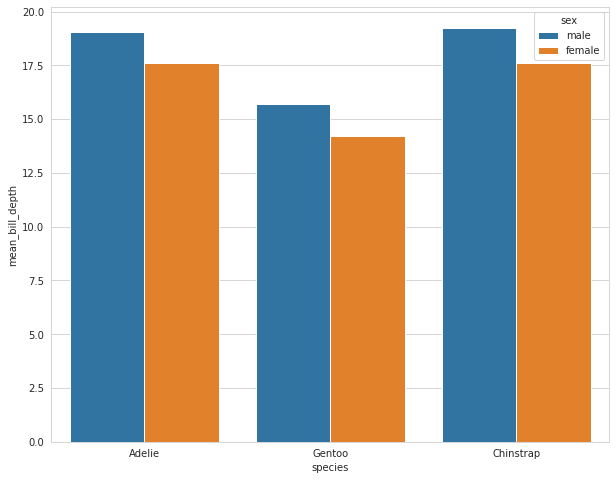

In [20]:
plt.figure(figsize = (10, 8))
sns.barplot(x = 'species', y = 'mean_bill_depth', hue = 'sex', data = new_df)
plt.show()

- From the above plot we can see that penguin species Chinstrap(male & female) has highest bill depth.

In [21]:
new_df.head()

,species,sex,flipper_length_mm,body_mass_g,mean_bill_length,mean_bill_depth
0,Adelie,male,181,3750,40.390411,19.072603
1,Adelie,female,186,3800,37.257534,17.621918
2,Adelie,female,195,3250,37.257534,17.621918
3,Adelie,female,193,3450,37.257534,17.621918
4,Adelie,male,190,3650,40.390411,19.072603


In [22]:
new_df.drop('mean_bill_length', axis = 1, inplace = True)

In [23]:
new_df['mean_flipper_length'] = df.groupby(['species', 'sex'])['flipper_length_mm'].transform('mean')

In [24]:
new_df['mean_body'] = df.groupby(['species', 'sex'])['body_mass_g'].transform('mean')

In [25]:
new_df.head()

,species,sex,flipper_length_mm,body_mass_g,mean_bill_depth,mean_flipper_length,mean_body
0,Adelie,male,181,3750,19.072603,192.410959,4043.493151
1,Adelie,female,186,3800,17.621918,187.794521,3368.835616
2,Adelie,female,195,3250,17.621918,187.794521,3368.835616
3,Adelie,female,193,3450,17.621918,187.794521,3368.835616
4,Adelie,male,190,3650,19.072603,192.410959,4043.493151


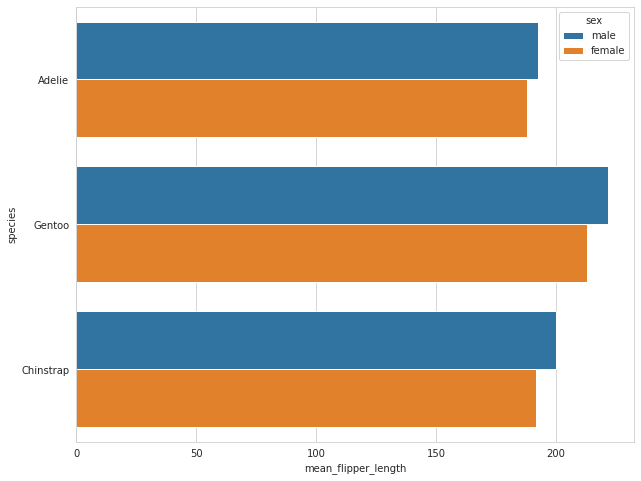

In [26]:
plt.figure(figsize = (10, 8))
sns.barplot(x = 'mean_flipper_length', y = 'species',hue = 'sex', data = new_df)
plt.show()

- From the above plot we can conclude that penguin species Gentoo(male & female) has the highest flipper length.

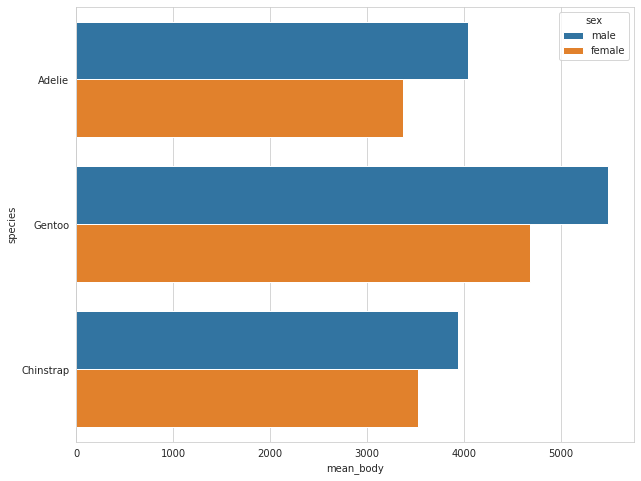

In [27]:
plt.figure(figsize = (10, 8))
sns.barplot(x = 'mean_body', y = 'species',hue = 'sex', data = new_df)
plt.show()

- From the above plot we can conclude that the penguins species Gentoo (male & female) has highest body mass.

In [28]:
#Feature Engineering
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
3,Adelie,Torgersen,36.7,19.3,193,3450,female
4,Adelie,Torgersen,39.3,20.6,190,3650,male


In [29]:
df['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [30]:
df['species'] = df['species'].replace({'Adelie': 0, 'Gentoo': 1, 'Chinstrap': 2})

In [31]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Torgersen,39.1,18.7,181,3750,male
1,0,Torgersen,39.5,17.4,186,3800,female
2,0,Torgersen,40.3,18.0,195,3250,female
3,0,Torgersen,36.7,19.3,193,3450,female
4,0,Torgersen,39.3,20.6,190,3650,male


In [32]:
df = pd.get_dummies(df)

In [33]:
df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,0,39.1,18.7,181,3750,0,0,1,0,1
1,0,39.5,17.4,186,3800,0,0,1,1,0
2,0,40.3,18.0,195,3250,0,0,1,1,0
3,0,36.7,19.3,193,3450,0,0,1,1,0
4,0,39.3,20.6,190,3650,0,0,1,0,1


In [34]:
df.shape

(333, 10)

In [35]:
#Now split dataset into independent variable and dependent variable
X = df.drop('species', axis = 1)
y = df['species']

In [36]:
X.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181,3750,0,0,1,0,1
1,39.5,17.4,186,3800,0,0,1,1,0
2,40.3,18.0,195,3250,0,0,1,1,0
3,36.7,19.3,193,3450,0,0,1,1,0
4,39.3,20.6,190,3650,0,0,1,0,1


In [37]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [39]:
#Now splitting dataset into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [40]:
print(x_train.shape, x_test.shape)

(266, 9) (67, 9)


In [41]:
print(y_train.shape, y_test.shape)

(266,) (67,)


In [42]:
#Scaling dataset
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [43]:
x_train[:5]

array([[ 0.92804222, -1.30893172,  0.74357505,  0.48468373,  0.98507379,
        -0.76376262, -0.37633881,  1.03054136, -1.03054136],
       [-1.25311758,  0.37012756, -0.73090497, -1.09021915, -1.01515238,
         1.30930734, -0.37633881,  1.03054136, -1.03054136],
       [-0.587679  , -0.24043945, -1.01175831, -1.27550184, -1.01515238,
         1.30930734, -0.37633881,  1.03054136, -1.03054136],
       [-1.51189925,  1.08245573, -0.87133164, -0.53437107,  0.98507379,
        -0.76376262, -0.37633881,  1.03054136, -1.03054136],
       [-0.66161662,  0.92981398, -1.50325165, -0.34908838,  0.98507379,
        -0.76376262, -0.37633881, -0.97036377,  0.97036377]])

In [44]:
#Now create classification model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [45]:
#Train the model
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
#Predict the model 
prediction = clf.predict(x_test)

In [47]:
prediction

array([0, 2, 0, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 0, 2, 0, 0, 1, 0, 2, 0, 0,
       2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 2, 2, 2, 0, 0, 2,
       0])

In [48]:
#Let's see the performance of the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_model = accuracy_score(y_test, prediction)
accuracy_model

1.0

In [49]:
cm = confusion_matrix(y_test, prediction)
cm

array([[31,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 18]])

In [50]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        18

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [51]:
import pickle

In [52]:
pickle.dump(clf, open("penguins_clf_model.pkl", 'wb'))